#Q2 Solve the following matrix using simultaneous equations in python
# x + y + z = 6
# 2y + 5z = -4
# 2x + 5y -z = 27

In [104]:
import numpy as np

def solveEquations(a,b):
    # Method to solve the equations
    return np.linalg.solve(a,b)

# Create a input and output matric from equations
a = np.array( [ [1,1,1], [0,2,5], [2,5,-1]  ] )
b = np.array([6,-4,27])
x,y,z = solveEquations(a,b)

print('\nThe value of \nx is {0},\ny is {1},\nz is {2}\n'.format(x,y,z))



The value of 
x is 5.0,
y is 3.0,
z is -2.0



# Q 3 Find the intercept, coefficient value and error term for this regression problem
in Python. How would you convey (interpret) these results in a business
context?	

# Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (You'll import sklearn as you need it.)**

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Confirming the working directory!

In [122]:
# from os import chdir, getcwd
wd=getcwd()
wd

'C:\\Users\\User\\Pilani-AIML'

# Get the Data
We'll work with the salary data csv file  It has years of exp and salary
** Read in the Salary csv file as a DataFrame called salary.**

In [107]:
salary = pd.read_csv("Salary_Data.csv")

In [108]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [109]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


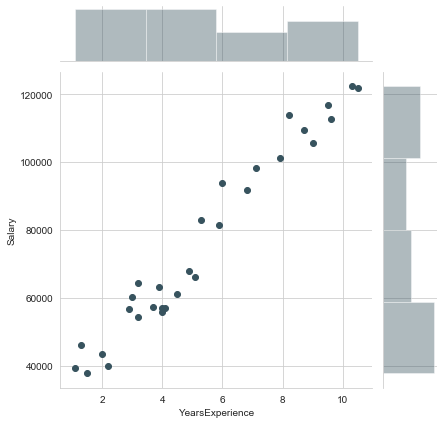

In [110]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='YearsExperience',y='Salary',data=salary)

# ***A hexagonal bin plot is created by covering the data range with a regular array of hexagons and coloring each hexagon according to the number of observations it covers. As with all bin plots, the hex-binned plots are good for visualizing large data sets for which a scatter plot would suffer from overplotting.

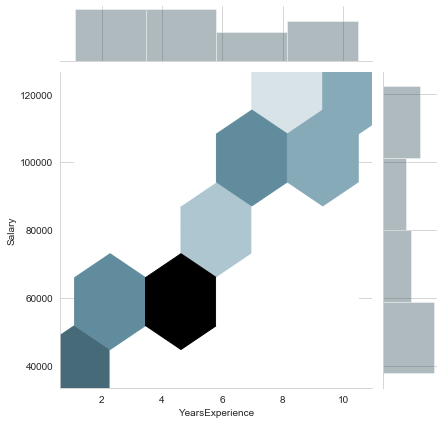

In [111]:
sns.jointplot(x='YearsExperience',y='Salary',kind='hex',data=salary)

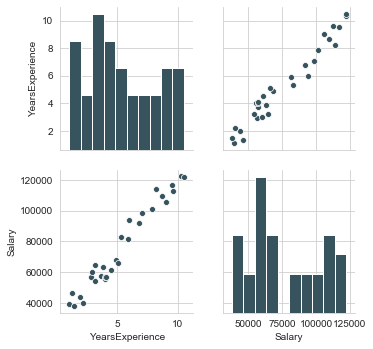

In [112]:
sns.pairplot(salary)

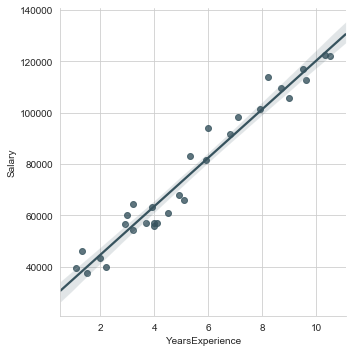

In [113]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary)

# Training and Testing Data

In [114]:
y = salary['Salary']
X = salary[['YearsExperience']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 2.10791071],
       [-0.33015469],
       [-1.05395536],
       [-1.32061876],
       [ 0.46983552],
       [ 1.19363619],
       [-0.29205992],
       [-0.71110241],
       [-0.10158606],
       [-1.3968083 ],
       [ 0.88887801],
       [-0.97776581],
       [-0.59681809],
       [-0.25396515],
       [-0.40634423],
       [ 0.05079303],
       [ 2.18410026],
       [ 1.3079205 ],
       [-0.67300764],
       [ 0.20317212],
       [-0.29205992]])

# Training the Model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [115]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [116]:
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)


Coefficients: 
 [25140.38349789]
Intercept: 
 71627.0


# Predicting Test Data

In [117]:
predictions = lm.predict( X_test)

# ** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

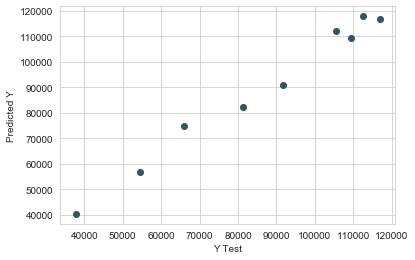

In [118]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [119]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.explained_variance_score(y_test, predictions))

MAE: 3038.6823612518815
MSE: 17978409.497344166
RMSE: 4240.095458517905
R2: 0.9862169509199884


# Residuals
We have got a very good model with a good fit. Let's Find out the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

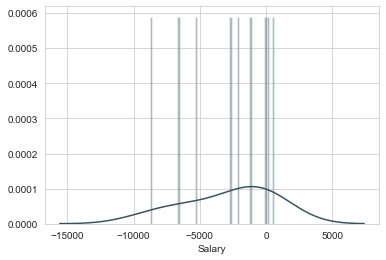

In [120]:
sns.distplot((y_test-predictions),bins=50);

# Conclusion
For one unit increase in Years of experience Salary should be increase by 25140.383498 . Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below

In [121]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
YearsExperience,25140.383498
